In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 모델 로드
model = tf.keras.models.load_model("somatotype_model.keras")
# model.summary()

In [2]:
# 성, 신장, 체중, 체지방량, 근육량 입력 받기_07_04_02
gender = int(input("성별은? 남=1, 여=2: "))
height = float(input("신장은? cm: "))
weight = float(input("체중은? kg: "))
fat_kg = float(input("체지방량은?(kg):"))
mm_kg = float(input("근육량은?(kg):"))

# 입력 데이터를 표준점수로 변환
data = pd.read_csv('somatotype.csv')
x_data = data[['gender', 'height', 'weight', 'fat_kg', 'mm_kg']]
scaler = StandardScaler()
scaler.fit(x_data)
input_data = [[gender, height, weight, fat_kg, mm_kg]]
input_data_normalized = scaler.transform(input_data)

print(input_data)
print(input_data_normalized)

[[1, 186.0, 69.0, 15.0, 35.0]]
[[-0.9537936   1.81008895 -0.04013446 -0.43994631 -1.18097871]]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
# 모델을 사용하여 체형 예측_07_04_03
prediction = model.predict(input_data_normalized)
endo = prediction[0][0]*10
meso = prediction[0][1]*10
ecto = prediction[0][2]*10

print("체형예측!  ", end="")
print("내배엽: {:.1f}, 중배엽: {:.1f}, 외배엽: {:.1f}".format(endo, meso, ecto))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
체형예측!  내배엽: 7.7, 중배엽: 1.5, 외배엽: 7.4


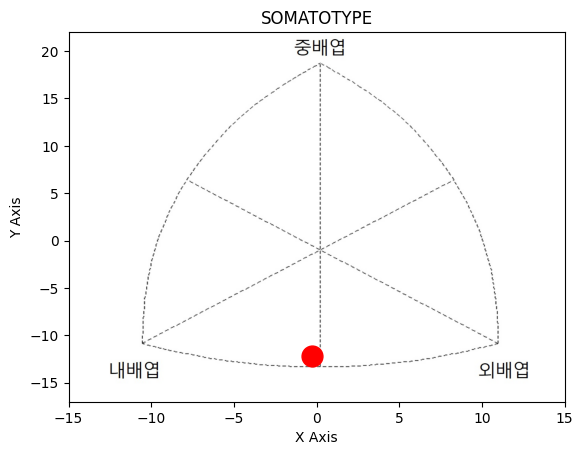

In [4]:
# 체형차트 그리기_07_04_04
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x_axis = ecto-endo
y_axis = 2*meso-(endo+ecto)
# print("x축: {:.1f}, y축: {:.1f}".format(x_axis, y_axis))

plt.plot(x_axis, y_axis, 'ro', markersize=15)  # 'ro'는 붉은원으로 표시
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('SOMATOTYPE')
plt.grid(False)

plt.xlim(-15, 15) # x_axis 범위
plt.ylim(-17, 22) # y_axis 범위

img = mpimg.imread('somato_chart.jpg')
plt.imshow(img, extent=[-15, 15, -16, 22], aspect='auto')

plt.show()